## Importing Packages

In [ ]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 51.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9308 sha256=5e0039f1b8a9c53b6ac8ae57c33d5443bba28f774a60b7590fcd09bc47adb956
  Stored in directory: /root/.cache/pip/wheels/65/3c/c7/44672c5062c16d05760b1eaddbf611d2f6a4b715c6d6777418
Successfully built flashtext


## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing NLP Libraries

In [ ]:
import nltk            # library for nlp
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.corpus import stopwords   # to get collection of stopwords
from textblob import TextBlob # to correct misspelled words
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pandas as pd    # to load dataset witch is on csv format by the read_csv(path) method
import numpy as np     # for mathematic equation, dataframes are build on numpy arrays
from sklearn.model_selection import train_test_split       # for splitting dataset into test/train sets

## Visualisation Packages

In [ ]:
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

## Data Preprocessing


### Loading Data

In [ ]:
path = "/content/drive/MyDrive/MovieReview/data/reviews.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,review,sentiment
0,the american action film has been slowly drown...,positive
1,"the ultimate match up between good and evil , ...",positive
2,"after bloody clashes and independence won , lu...",positive
3,one of my colleagues was surprised when i told...,positive
4,""" jaws "" is a rare film that grabs your atten...",positive


We can see that data has two columns:
1. review: the film review
2. sentiment: the associated sentiment with the review (our target)
--- 

## Loading Stopwords

In [ ]:
english_stops = set(stopwords.words('english'))

## Data Cleaning

In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
detokenizer = nltk.tokenize.TreebankWordDetokenizer()

In [ ]:
def lemmatize(text):
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

def detokenize(text):
    return detokenizer.detokenize(text)

In [ ]:
def load_dataset():
    df = pd.read_csv(path)
    features = df['review']       # Reviews/Input
    labels = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    features = features.replace({'<.*?>': ''}, regex = True)          # remove html tag
    features = features.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet

    # the links are removed but i think there are some links which start with www and not http which are not removed
    features = features.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    features = features.apply(lambda review: [w.lower() for w in review])   # lower case
    features = features.apply(lambda review: ' '.join(review))

    lemmatized_tokens = features.apply(lemmatize)

    # ENCODE SENTIMENT -> 0 & 1
    labels = labels.replace('positive', 1)
    labels = labels.replace('negative', 0)

    return features, labels, lemmatized_tokens

In [ ]:
x_data, y_data, lemmatized_tokens = load_dataset()

### Reviews

In [ ]:
x_data.head()

0    american action film slowly drowning death sea...
1    ultimate match good evil untouchables excellen...
2    bloody clashes independence lumumba refused pa...
3    one colleagues surprised told willing see bets...
4    jaws rare film grabs attention shows single im...
Name: review, dtype: object

Sentiment

In [ ]:
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment, dtype: int64

## Distribution of the sentiments

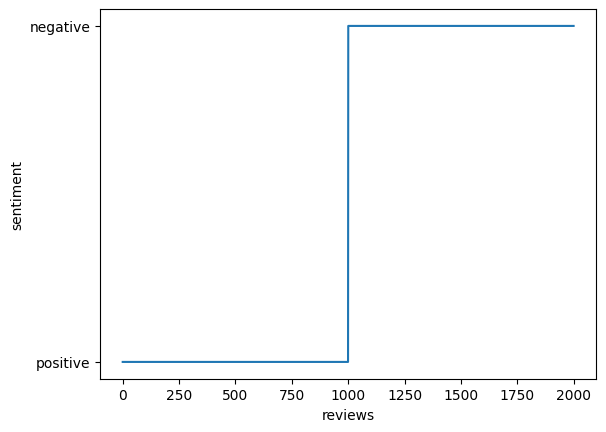

In [ ]:
plt.plot(y_data.index, data['sentiment'])
plt.xlabel('reviews')
plt.ylabel('sentiment')
plt.show()

### Splitting Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)

## The distribution of sentiments throughout the train set is visualised.


In [ ]:
train = pd.Series(y_train.values)
xaxis = train.index
yaxis = y_train
yaxis = yaxis.replace(0, 'negative')
yaxis = yaxis.replace(1, 'positive')


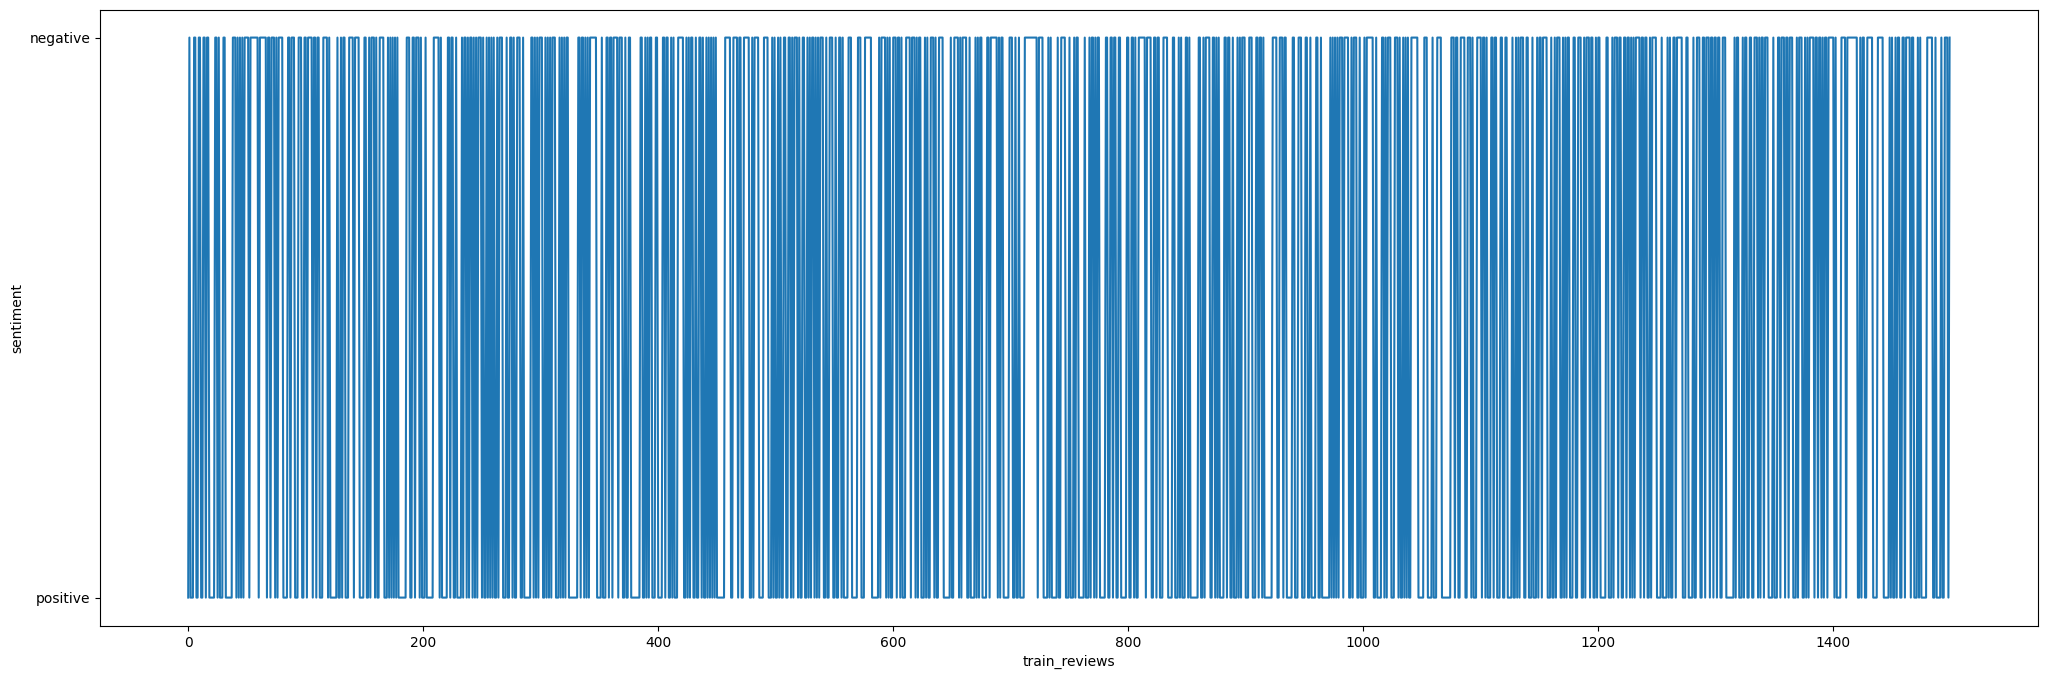

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(xaxis, yaxis)
plt.xlabel('train_reviews')
plt.ylabel('sentiment')
plt.show()

## The distribution of sentiments throughout the test set is visualised.


In [ ]:
test = pd.Series(y_test.values)
xaxis = test.index
yaxis = y_test
yaxis = yaxis.replace(0, 'negative')
yaxis = yaxis.replace(1, 'positive')


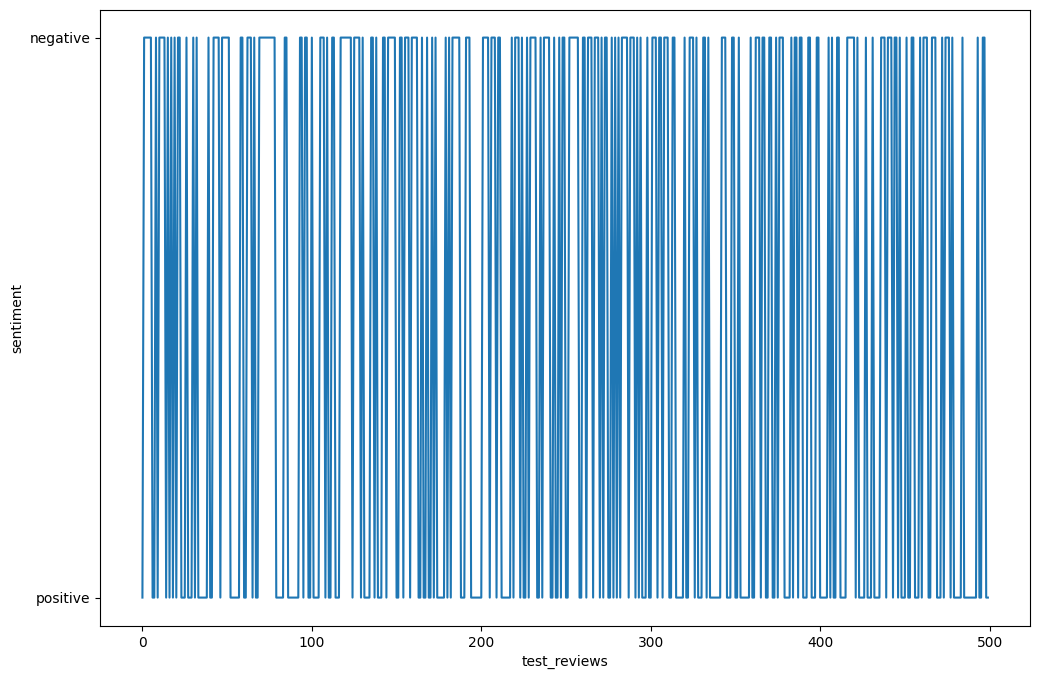

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xaxis, yaxis)
plt.xlabel('test_reviews')
plt.ylabel('sentiment')
plt.show()

### Preparing the text Data

### Vectorizing sentences


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#create the transformer
count_vectorizer = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
count_vectorizer.fit(x_train)

x_train_count_dtm = count_vectorizer.transform(x_train)
x_test_count_dtm = count_vectorizer.transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# learn training data vocabulary, then use it to create a document-term matrix
tf_idf_vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True) #optimized hyperparameters found

tf_idf_vectorizer.fit(x_train)

x_train_tfidf_dtm = tf_idf_vectorizer.transform(x_train)
x_test_tfidf_dtm = tf_idf_vectorizer.transform(x_test)

## Graph Analysis


A visual representation of the 30 most common words.

We see that the majority of them (24 neutral words and 6 tender terms) lack sentimentality.


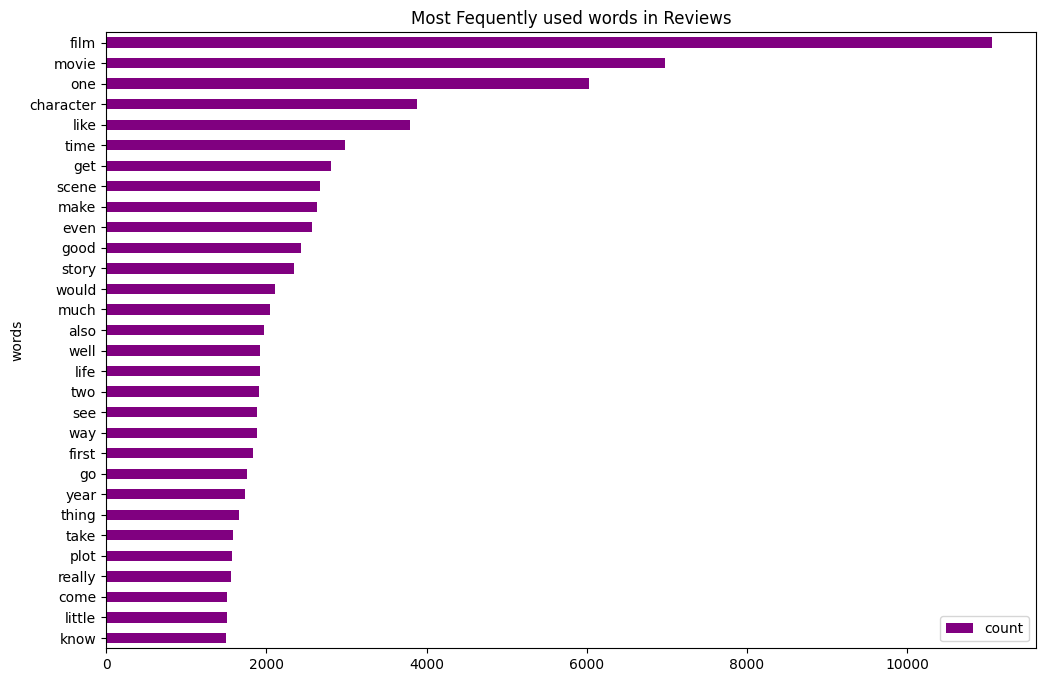

In [ ]:
tokens = list(lemmatized_tokens)
token_list = list(itertools.chain(*tokens))
counts_no = Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Most Fequently used words in Reviews")
plt.show()

30 of the most common terms in good ratings are represented visually.

We see that the majority of them (24 neutral words and 6 tender terms) lack sentimentality.

We also see that, as would be expected, only good evaluations usually include the word "best," which has a positive connotation.


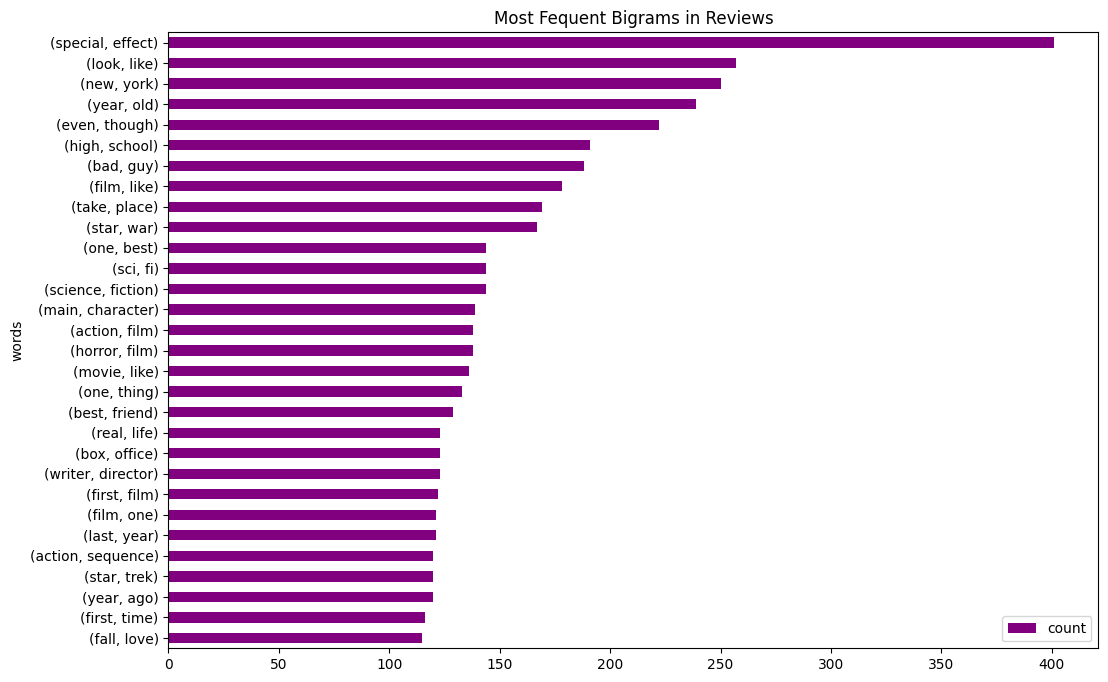

In [ ]:
bigrams = zip(token_list,token_list[1:])
counts_no = Counter(bigrams)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Most Fequent Bigrams in Reviews")
plt.show()

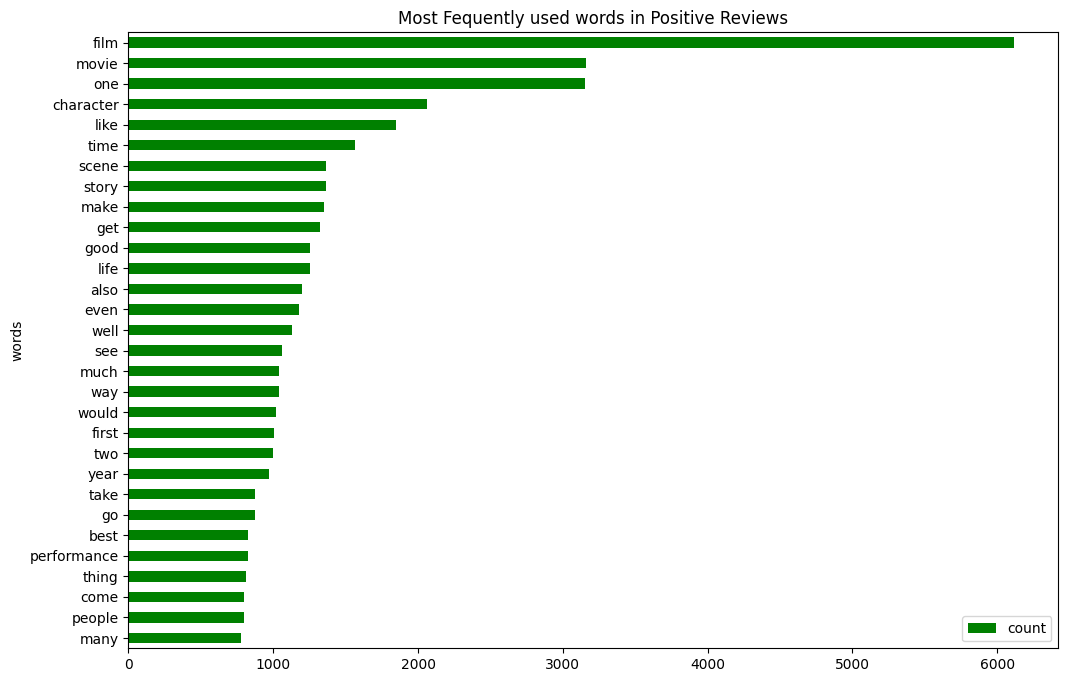

In [ ]:
tokens = list(lemmatized_tokens.loc[data['sentiment'] == "positive"])
token_list = list(itertools.chain(*tokens))
counts_no = Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="green")
ax.set_title("Most Fequently used words in Positive Reviews")
plt.show()

Visualisation of the 30 terms that appear the most frequently in bad reviews.

We see that the majority of them (22 neutral words and 8 emotive terms) lack sentimentality.

We also note that the word "good," which has a positive connotation, appears roughly a thousand times in negative evaluations, a number that is occasionally lower than in positive ones. 

Additionally, the term "little," which has a bad connotation, only appears in bad evaluations, as one might expect.

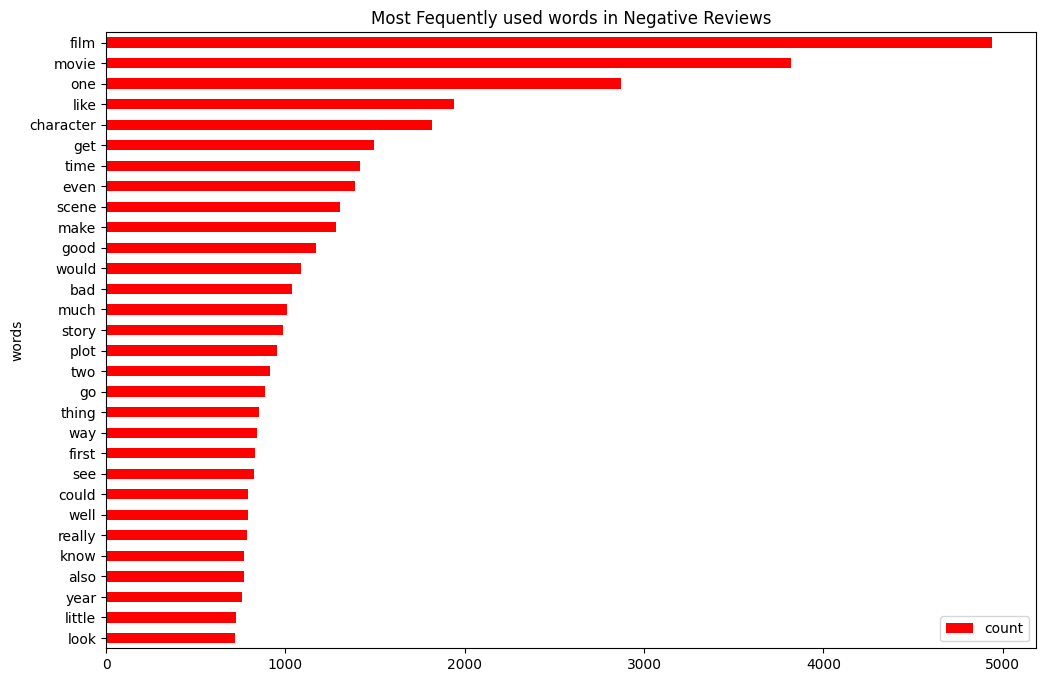

In [ ]:
tokens = list(lemmatized_tokens.loc[data['sentiment'] == "negative"])
token_list = list(itertools.chain(*tokens))
counts_no = Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="red")
ax.set_title("Most Fequently used words in Negative Reviews")
plt.show()

Statistical Visualization:

In [ ]:
from sklearn import metrics

def Metrics_Viz(y_test, y_pred_class, start, stop, step, label):
    report = classification_report(y_test, y_pred_class, output_dict=True, labels=[0,1])
    print("\nMetrics: ")
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print(type(accuracy))
    
    print('accuracy: ' + str(accuracy))
    
    print('positive: ', report['0'])
    print('negative: ', report['1'])
    
    print("\n")

    N = 2
    ind = np.arange(N) 
    width = 0.25
    fig, ax = plt.subplots(figsize=(8,6))
    ax.margins(x=0, y=-0.1)

    xvals = [report['0']['precision']*100, report['1']['precision']*100]
    bar1 = ax.bar(ind, xvals, width, color = 'r')
 
    yvals = [report['0']['recall']*100, report['1']['recall']*100]
    bar2 = ax.bar(ind+width, yvals, width, color='g')
  
    zvals = [report['0']['f1-score']*100, report['1']['f1-score']*100]
    bar3 = ax.bar(ind+width*2, zvals, width, color = 'b')
  
    plt.xlabel("Sentiment", size=16)
    plt.ylabel('Percentage %', size=16)
    plt.title(label, size=20)
  
    plt.ylim(start, stop)
    plt.yticks(np.arange(start, stop, step), size=12)
    plt.xticks(ind+width,["Positive\n(Support={})".format(report['0']['support']), "Negative\n(Support={})".format(report['1']['support'])], size=14)
    plt.legend( (bar1, bar2, bar3), ('Precision', 'Recall', 'F1-Score'))
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')
    plt.show()
    return report, accuracy


Confusion Matrix Visualization:

In [ ]:
from sklearn import metrics

def Confusion_Matrix_Viz(label):
    print('\nConfusion Matrix:')
    print(metrics.confusion_matrix(y_test, y_pred_class))
    print("\n")

    import seaborn as sns
    sns.set(style='white')
    cm = metrics.confusion_matrix(y_test, y_pred_class)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=cm, fmt='g', annot_kws={'size': 30},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
    ax.tick_params(labelsize=16, length=0)

    ax.set_title(label, size=16, pad=20)
    ax.set_xlabel('Predicted Values', size=16)
    ax.set_ylabel('Actual Values', size=16)

    additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
            ha='center', va='top', size=20)
    plt.tight_layout()
    plt.show()
    return cm

#Stastisticals Models for sentiement classification

## Support Vectors Machines

we will use [support vector machines](https://scikit-learn.org/stable/modules/svm.html)

> SVM is a supervised(feed-me) machine learning algorithm that can be used for both classification or regression challenges. SVM performs classification by finding the hyper-plane that differentiate the classes we plotted in n-dimensional space.

#### Polynomial kernel SVM

##### Count Vectorizer

Count Vectorizer:
CPU times: user 6 s, sys: 6.59 ms, total: 6.01 s
Wall time: 6.06 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.584
positive:  {'precision': 0.542528735632184, 'recall': 0.963265306122449, 'f1-score': 0.6941176470588235, 'support': 245}
negative:  {'precision': 0.8615384615384616, 'recall': 0.2196078431372549, 'f1-score': 0.35, 'support': 255}




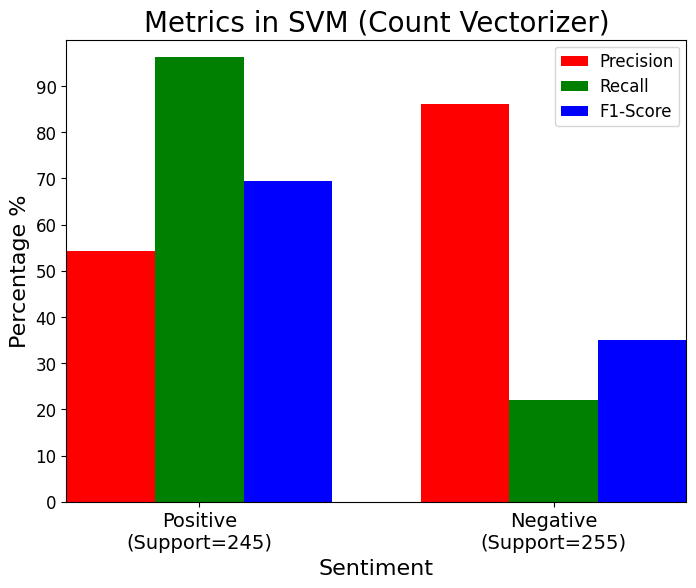


Confusion Matrix:
[[236   9]
 [199  56]]




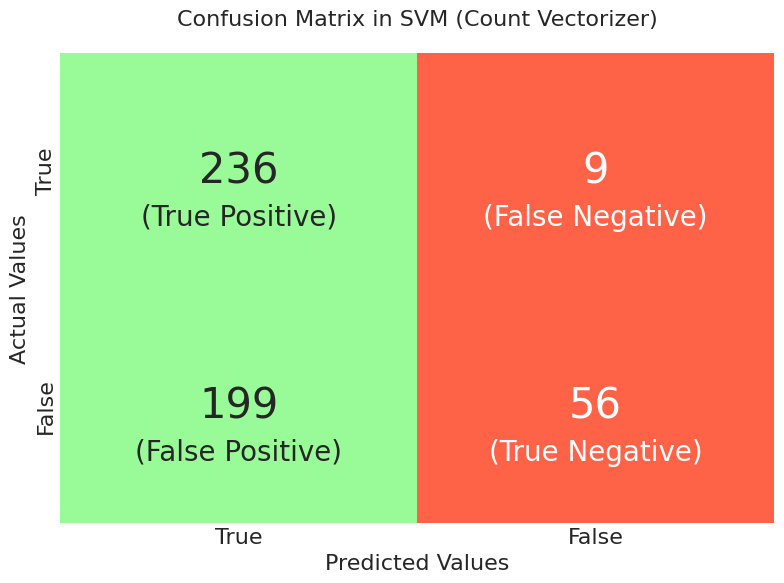

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report


# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='poly')

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time classifier_linear.fit(x_train_count_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 0, 100, 10, 'Metrics in SVM (Count Vectorizer)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Count Vectorizer)')

##### Tf_Idf


Tf_idf:
CPU times: user 5.02 s, sys: 19.6 ms, total: 5.04 s
Wall time: 5 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.804
positive:  {'precision': 0.7508532423208191, 'recall': 0.8979591836734694, 'f1-score': 0.8178438661710037, 'support': 245}
negative:  {'precision': 0.8792270531400966, 'recall': 0.7137254901960784, 'f1-score': 0.7878787878787878, 'support': 255}




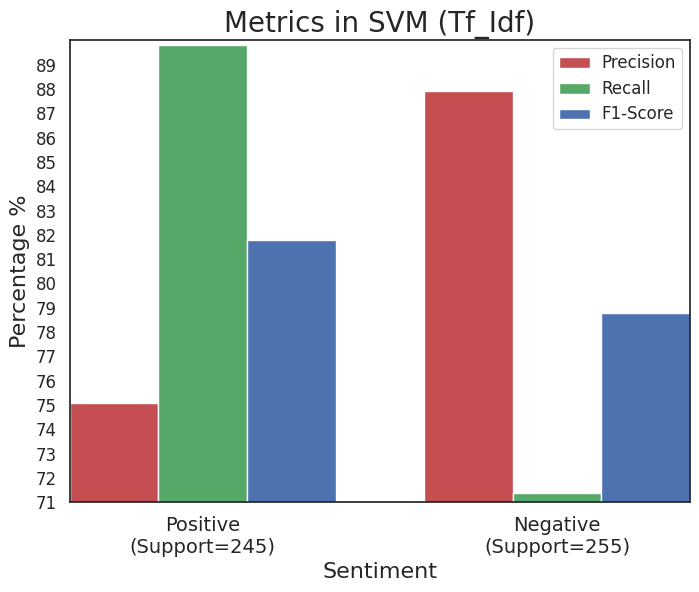


Confusion Matrix:
[[220  25]
 [ 73 182]]




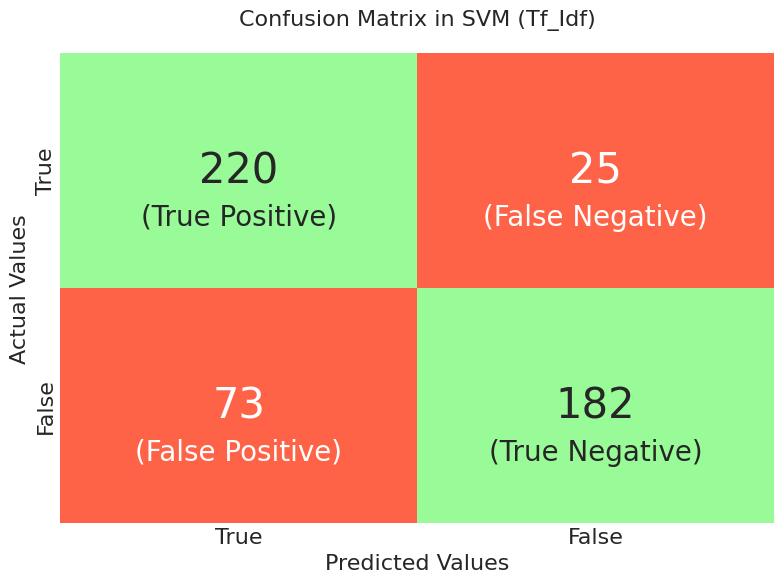

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time classifier_linear.fit(x_train_tfidf_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
svm_report, svm_accuracy = Metrics_Viz(y_test, y_pred_class, 71, 90, 1, 'Metrics in SVM (Tf_Idf)')

# compute and show confusion matrix
svm_cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Tf_Idf)')

#### Linear kernel SVM

The tuning parameter Kernel — “RBF” is for non-linear problems and it is also a general-purpose kernel used when there is no prior knowledge about the data. Kernel —” linear” is for linear separable problems. Since our problem is linear(just positive and negative) here, we will go for “linear SVM”.

##### Count Vectorizer:

Count Vectorizer:
CPU times: user 5.55 s, sys: 30.1 ms, total: 5.58 s
Wall time: 5.62 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.832
positive:  {'precision': 0.8285714285714286, 'recall': 0.8285714285714286, 'f1-score': 0.8285714285714286, 'support': 245}
negative:  {'precision': 0.8352941176470589, 'recall': 0.8352941176470589, 'f1-score': 0.8352941176470589, 'support': 255}




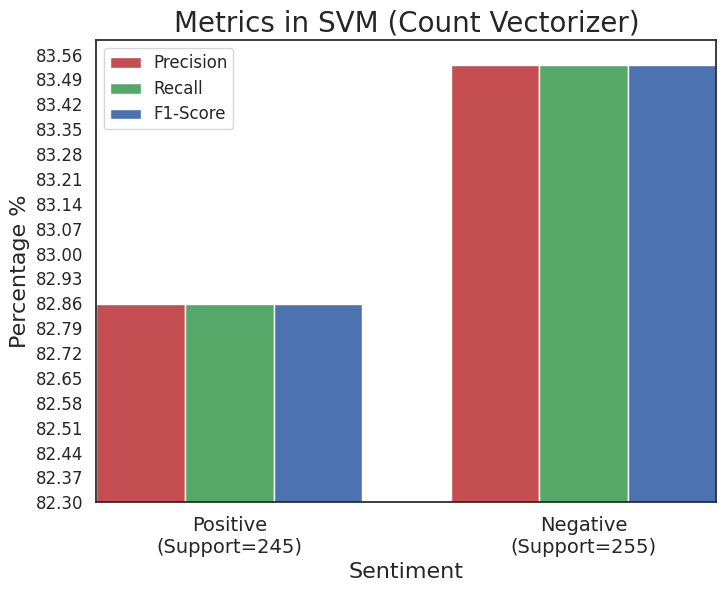


Confusion Matrix:
[[203  42]
 [ 42 213]]




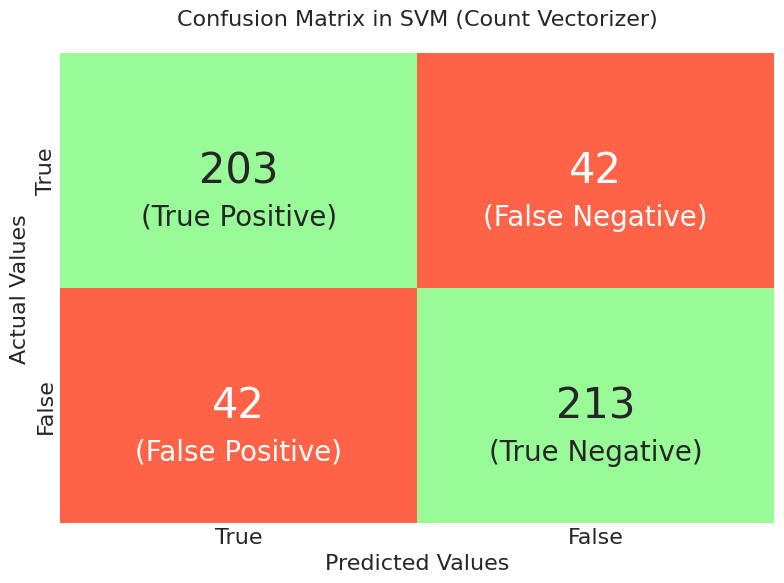

In [ ]:
from sklearn import svm

# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time classifier_linear.fit(x_train_count_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 82.3, 83.6, 0.07, 'Metrics in SVM (Count Vectorizer)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Count Vectorizer)')

##### Tf_idf:


Tf_idf:
CPU times: user 4.72 s, sys: 30.5 ms, total: 4.75 s
Wall time: 4.71 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.882
positive:  {'precision': 0.8780487804878049, 'recall': 0.8816326530612245, 'f1-score': 0.8798370672097761, 'support': 245}
negative:  {'precision': 0.8858267716535433, 'recall': 0.8823529411764706, 'f1-score': 0.8840864440078585, 'support': 255}




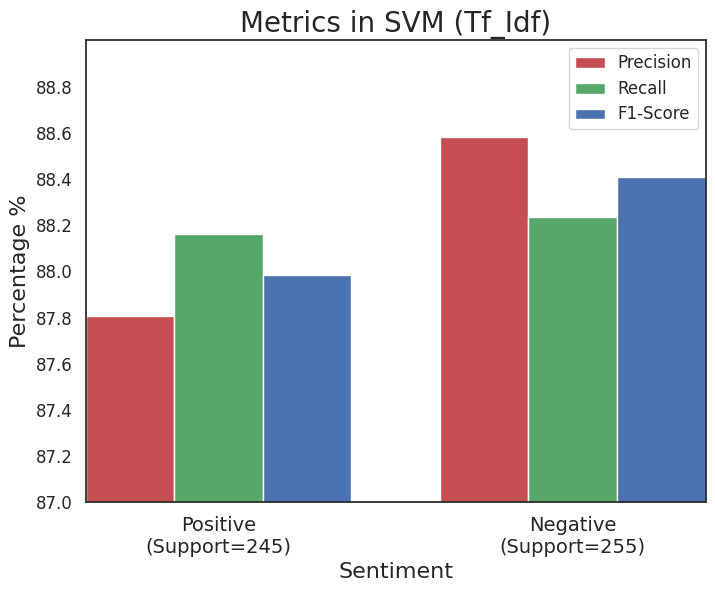


Confusion Matrix:
[[216  29]
 [ 30 225]]




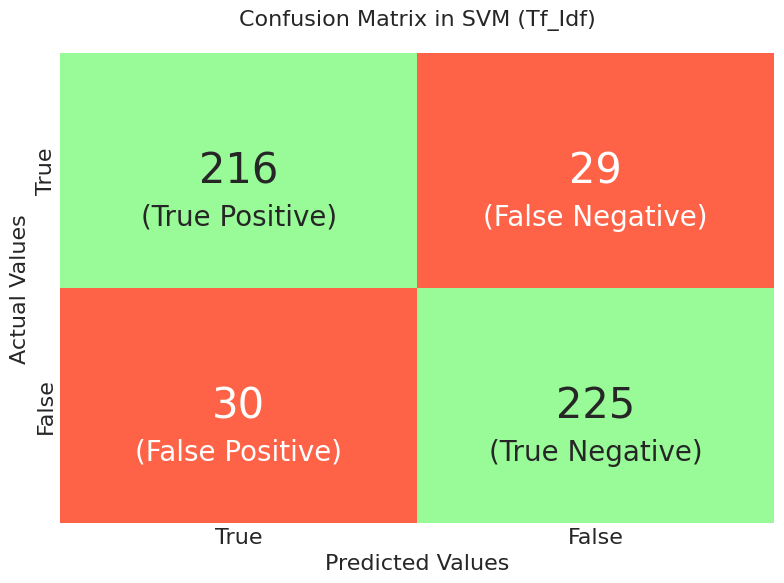

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time classifier_linear.fit(x_train_tfidf_dtm, y_train)
y_pred_class = classifier_linear.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
svm_report, svm_accuracy = Metrics_Viz(y_test, y_pred_class, 87, 89, 0.2, 'Metrics in SVM (Tf_Idf)')

# compute and show confusion matrix
svm_cm = Confusion_Matrix_Viz('Confusion Matrix in SVM (Tf_Idf)')

# Training Different Models for comparison



## Multinomial Naive Bayes

We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

#### Multinomial Naive Bayes Without Smoothing:

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0)

##### Count Vectorizer

Count Vectorizer:
CPU times: user 8.73 ms, sys: 6.2 ms, total: 14.9 ms
Wall time: 17.1 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.72
positive:  {'precision': 0.7419354838709677, 'recall': 0.6571428571428571, 'f1-score': 0.6969696969696969, 'support': 245}
negative:  {'precision': 0.7031802120141343, 'recall': 0.7803921568627451, 'f1-score': 0.7397769516728624, 'support': 255}




/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


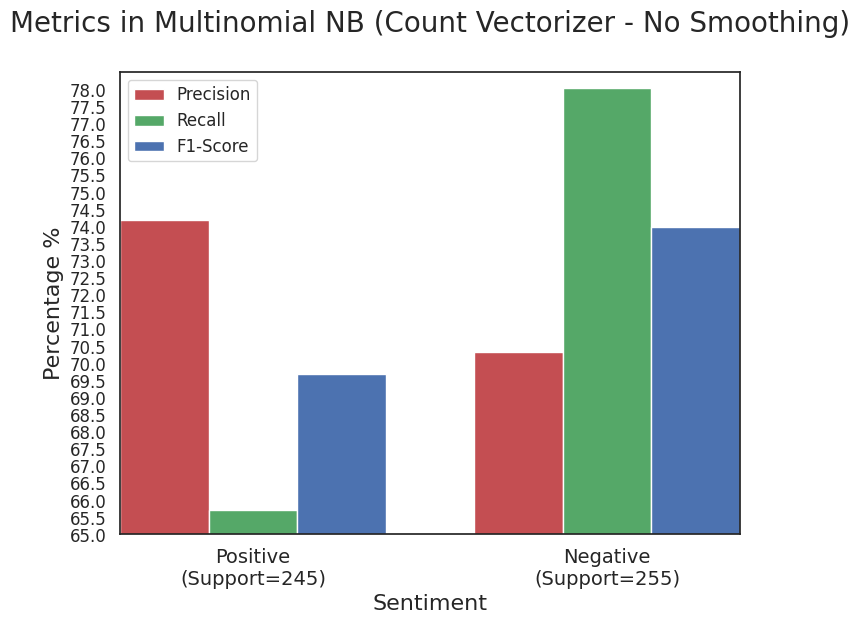


Confusion Matrix:
[[161  84]
 [ 56 199]]




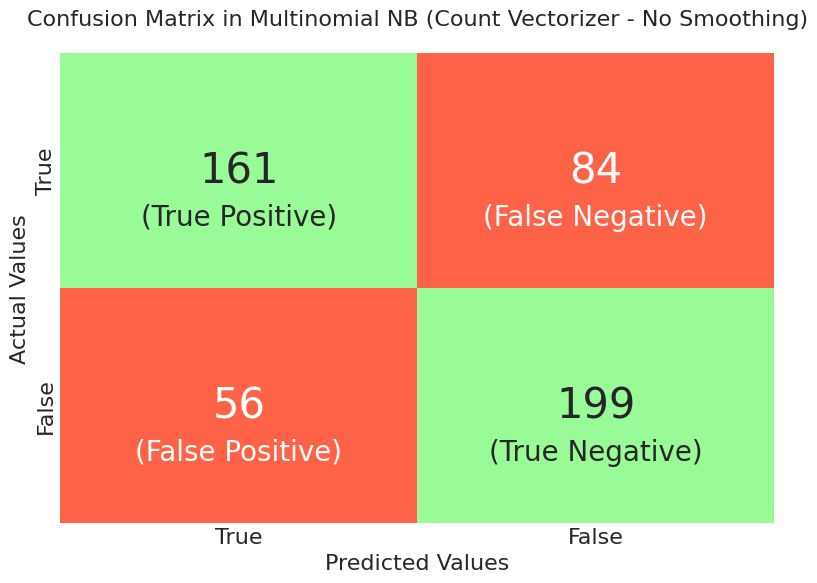

In [ ]:
from sklearn.metrics import classification_report

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time nb.fit(x_train_count_dtm, y_train)
y_pred_class = nb.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 65, 78.5, 0.5, "Metrics in Multinomial NB (Count Vectorizer - No Smoothing)\n")

# compute and show confusion matrix
cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Count Vectorizer - No Smoothing)")

##### Tf-Idf


Tf_idf:
CPU times: user 7.25 ms, sys: 2.04 ms, total: 9.29 ms
Wall time: 6.58 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.752
positive:  {'precision': 0.7737556561085973, 'recall': 0.6979591836734694, 'f1-score': 0.7339055793991416, 'support': 245}
negative:  {'precision': 0.7347670250896058, 'recall': 0.803921568627451, 'f1-score': 0.7677902621722846, 'support': 255}




/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


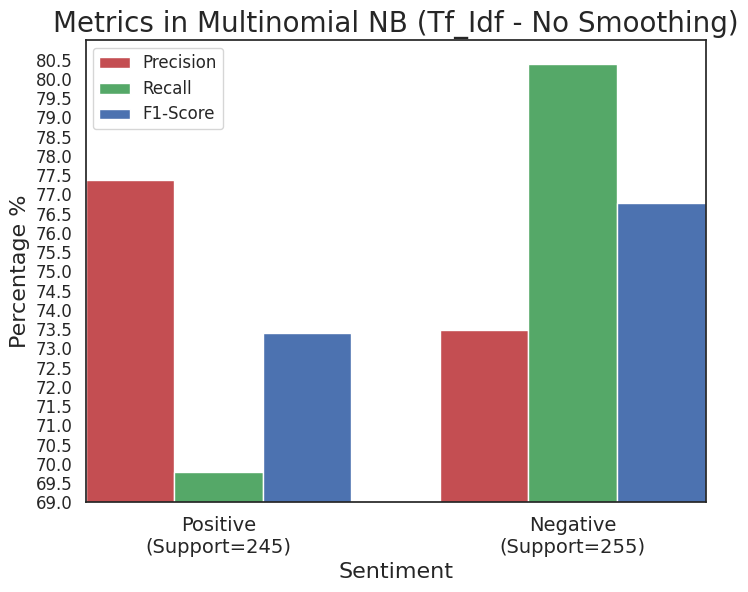


Confusion Matrix:
[[171  74]
 [ 50 205]]




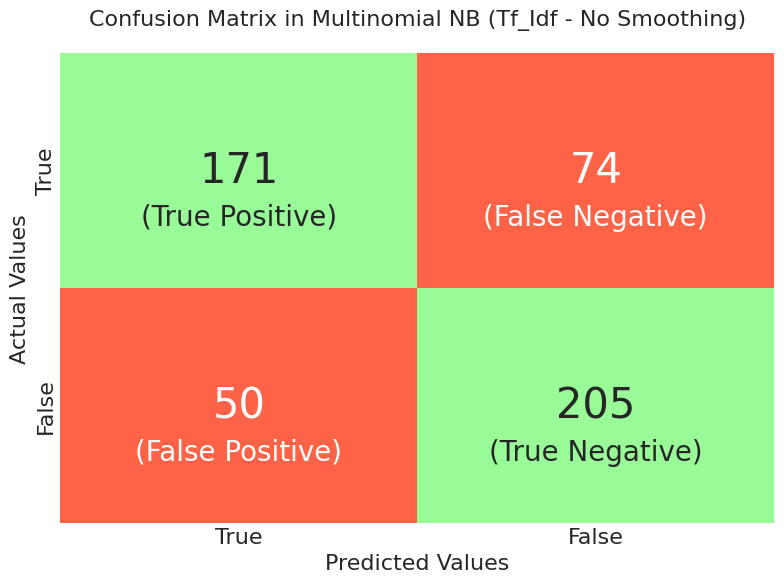

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time nb.fit(x_train_tfidf_dtm, y_train)
y_pred_class = nb.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 69, 81, 0.5, 'Metrics in Multinomial NB (Tf_Idf - No Smoothing)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Tf_Idf - No Smoothing)")

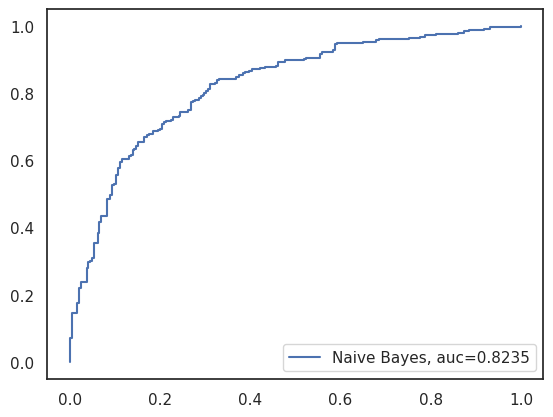

In [ ]:
# calculate AUC
y_pred_prob = nb.predict_proba(x_test_tfidf_dtm)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label=f"Naive Bayes, auc={auc:.5}")
plt.legend(loc=4)
plt.show()

#### Multinomial Naive Bayes With Laplacian Smoothing:

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=1)

##### Count Vectorizer

Count Vectorizer:
CPU times: user 5.43 ms, sys: 34 µs, total: 5.46 ms
Wall time: 5.55 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.832
positive:  {'precision': 0.8108108108108109, 'recall': 0.8571428571428571, 'f1-score': 0.8333333333333334, 'support': 245}
negative:  {'precision': 0.8547717842323651, 'recall': 0.807843137254902, 'f1-score': 0.8306451612903226, 'support': 255}




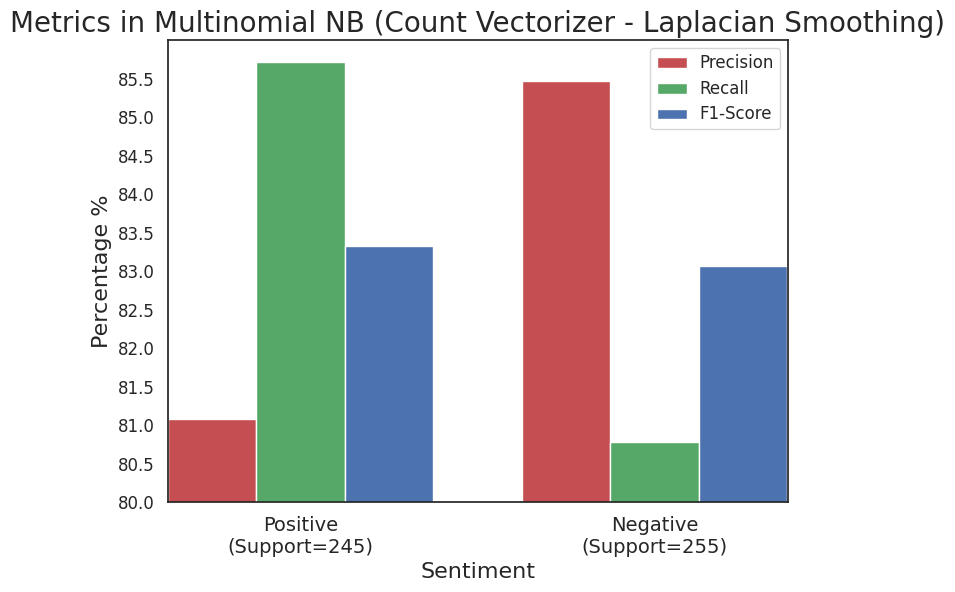


Confusion Matrix:
[[210  35]
 [ 49 206]]




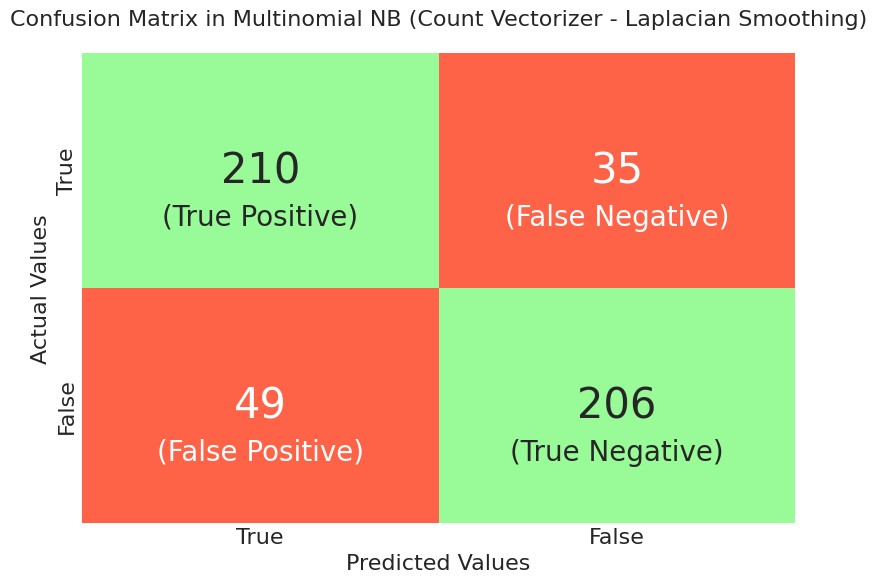

In [ ]:
from sklearn.metrics import classification_report

#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time nb.fit(x_train_count_dtm, y_train)
y_pred_class = nb.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 80, 86, 0.5, "Metrics in Multinomial NB (Count Vectorizer - Laplacian Smoothing)")

# compute and show confusion matrix
cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Count Vectorizer - Laplacian Smoothing)")

##### Tf-Idf


Tf_idf:
CPU times: user 5.49 ms, sys: 0 ns, total: 5.49 ms
Wall time: 5.5 ms
1699    star wars episode phantom menace director geor...
1813    sean connery stars harvard law professor heads...
1482    seen trailers commercials rather difficult rea...
367     plot good ol texan kid suddenly gets play firs...
730     let first say conditions forced watch matrix l...
                              ...                        
804     note ordinarily moviereviews org give away cri...
1629    difficult expect much director whose greatest ...
1653    walken stars mobster kidnapped held ransom fou...
446     rainy friday afternoon columbus persuaded frie...
589     harmless silly fun comedy dim witted wrestling...
Name: review, Length: 80, dtype: object

Metrics: 
<class 'numpy.float64'>
accuracy: 0.84
positive:  {'precision': 0.8160919540229885, 'recall': 0.8693877551020408, 'f1-score': 0.841897233201581, 'support': 245}
negative:  {'precision': 0.8661087866108786, 'recall': 0.811764705882352

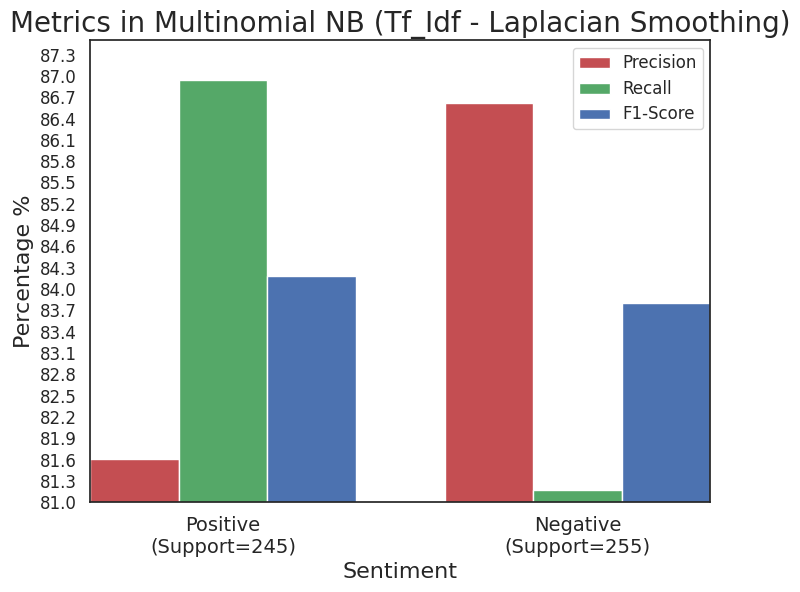


Confusion Matrix:
[[213  32]
 [ 48 207]]




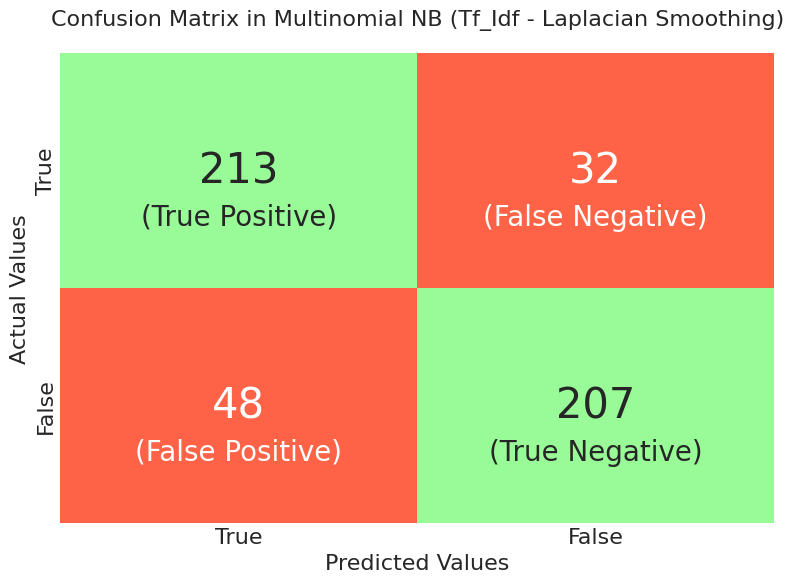

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time nb.fit(x_train_tfidf_dtm, y_train)
y_pred_class = nb.predict(x_test_tfidf_dtm)
diff = y_test - y_pred_class
diff = diff[diff!=0]
false_reviews = x_data.iloc[diff.index]
print(false_reviews)

# compute accuracy of class predictions and show method metrics
nb_report, nb_accuracy = Metrics_Viz(y_test, y_pred_class, 81, 87.5, 0.3, "Metrics in Multinomial NB (Tf_Idf - Laplacian Smoothing)")

# compute and show confusion matrix
nb_cm = Confusion_Matrix_Viz("Confusion Matrix in Multinomial NB (Tf_Idf - Laplacian Smoothing)")

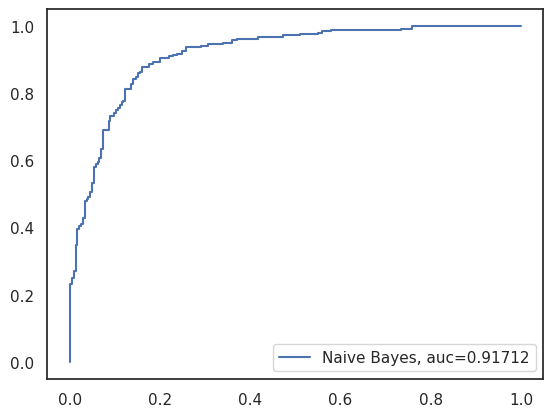

In [ ]:
# calculate AUC
y_pred_prob = nb.predict_proba(x_test_tfidf_dtm)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label=f"Naive Bayes, auc={auc:.5}")
plt.legend(loc=4)
plt.show()

## Logistic Regression

We will use [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

#### Linear Logistic Regression with l2 penalty

In [ ]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', penalty = 'l2')

##### Count Vectorizer:

Count Vectorizer:
CPU times: user 1.35 s, sys: 1.12 s, total: 2.48 s
Wall time: 2.4 s

Metrics: 
<class 'numpy.float64'>
accuracy: 0.852
positive:  {'precision': 0.8461538461538461, 'recall': 0.8530612244897959, 'f1-score': 0.8495934959349594, 'support': 245}
negative:  {'precision': 0.857707509881423, 'recall': 0.8509803921568627, 'f1-score': 0.8543307086614174, 'support': 255}




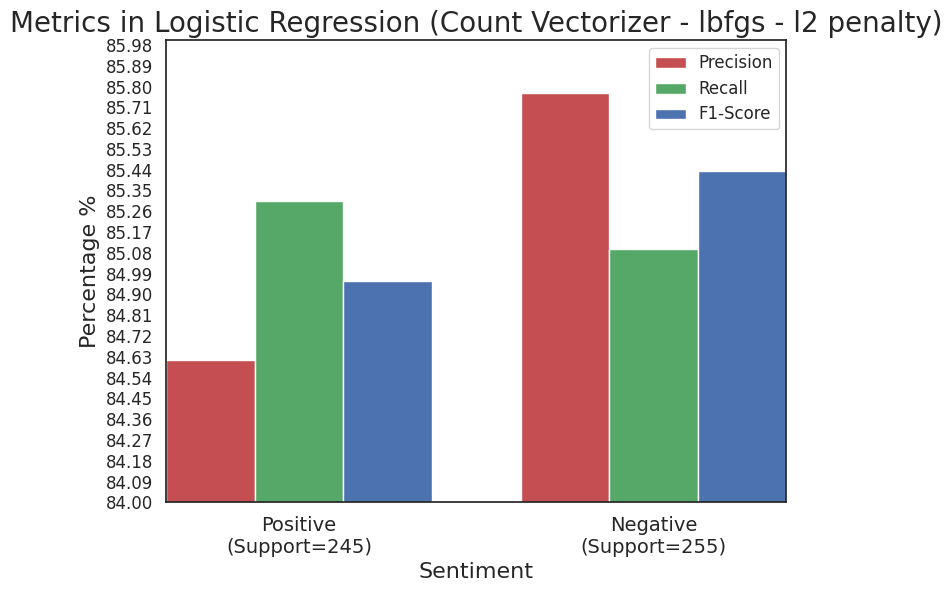


Confusion Matrix:
[[209  36]
 [ 38 217]]




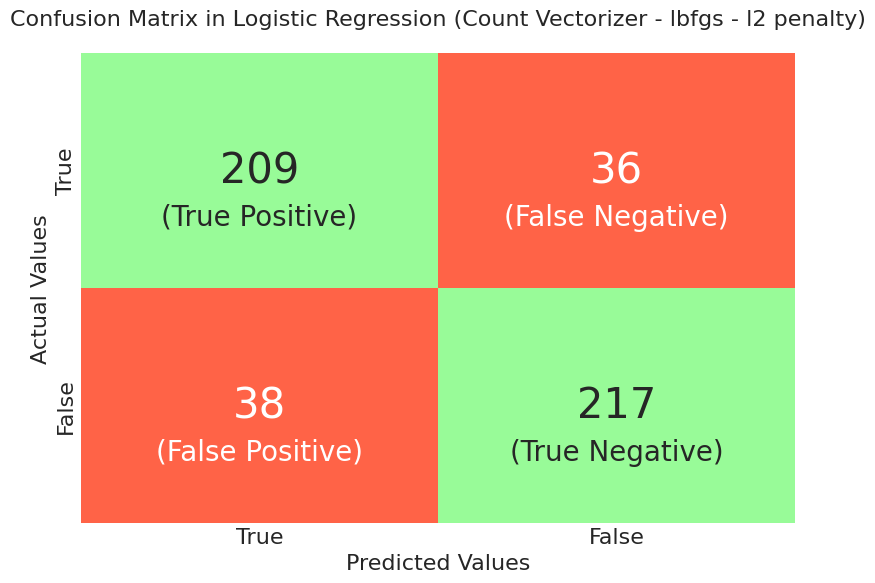

In [ ]:
#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time logreg.fit(x_train_count_dtm, y_train)
y_pred_class = logreg.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 84, 86, 0.09, 'Metrics in Logistic Regression (Count Vectorizer - lbfgs - l2 penalty)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Count Vectorizer - lbfgs - l2 penalty)')

##### Tf_idf:


Tf_idf:
CPU times: user 104 ms, sys: 84.6 ms, total: 188 ms
Wall time: 120 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.864
positive:  {'precision': 0.852589641434263, 'recall': 0.8734693877551021, 'f1-score': 0.8629032258064516, 'support': 245}
negative:  {'precision': 0.8755020080321285, 'recall': 0.8549019607843137, 'f1-score': 0.8650793650793651, 'support': 255}




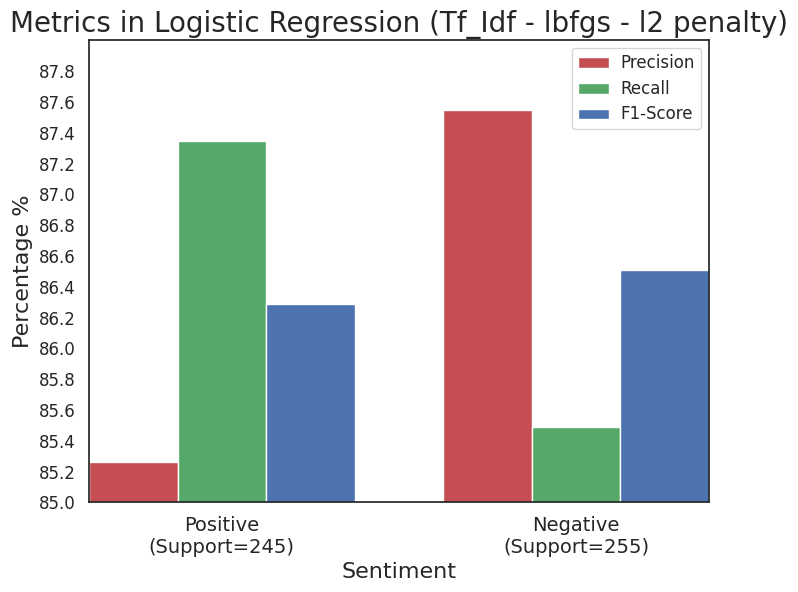


Confusion Matrix:
[[214  31]
 [ 37 218]]




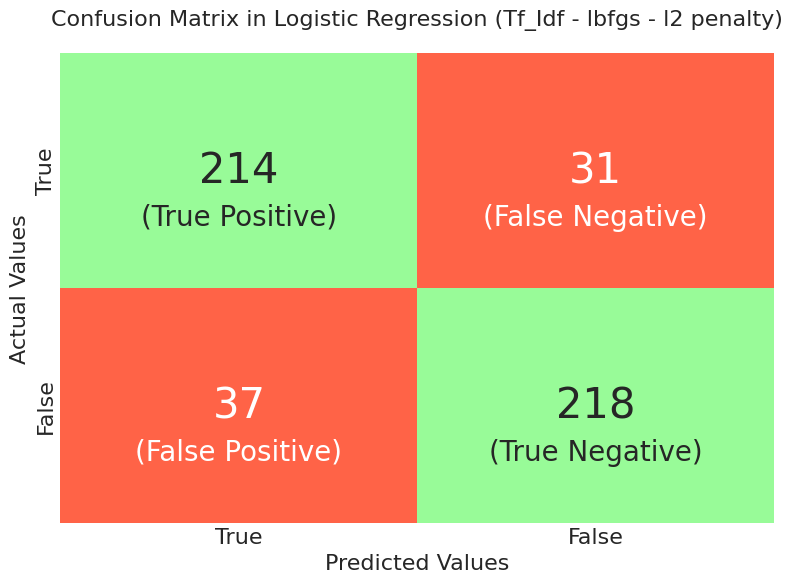

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time logreg.fit(x_train_tfidf_dtm, y_train)
y_pred_class = logreg.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
lg_report, lg_accuracy = Metrics_Viz(y_test, y_pred_class, 85, 88, 0.2, 'Metrics in Logistic Regression (Tf_Idf - lbfgs - l2 penalty)')

# compute and show confusion matrix
lg_cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Tf_Idf - lbfgs - l2 penalty)')

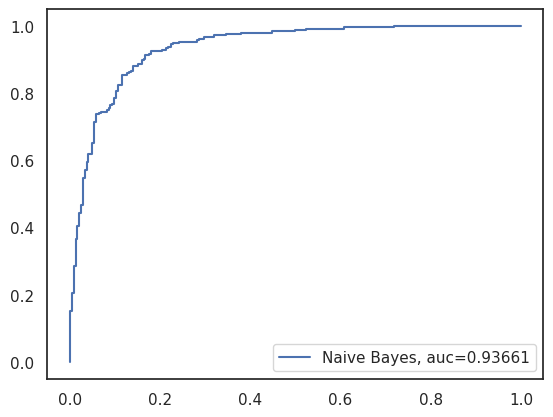

In [ ]:
# calculate AUC
y_pred_prob = logreg.predict_proba(x_test_tfidf_dtm)[:, 1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label=f"Naive Bayes, auc={auc:.5}")
plt.legend(loc=4)
plt.show()

#### Linear Logistic Regression without l2 penalty

In [ ]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', penalty='none')

##### Count Vectorizer

Count Vectorizer:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


CPU times: user 252 ms, sys: 418 ms, total: 670 ms
Wall time: 372 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.862
positive:  {'precision': 0.860655737704918, 'recall': 0.8571428571428571, 'f1-score': 0.8588957055214723, 'support': 245}
negative:  {'precision': 0.86328125, 'recall': 0.8666666666666667, 'f1-score': 0.8649706457925636, 'support': 255}




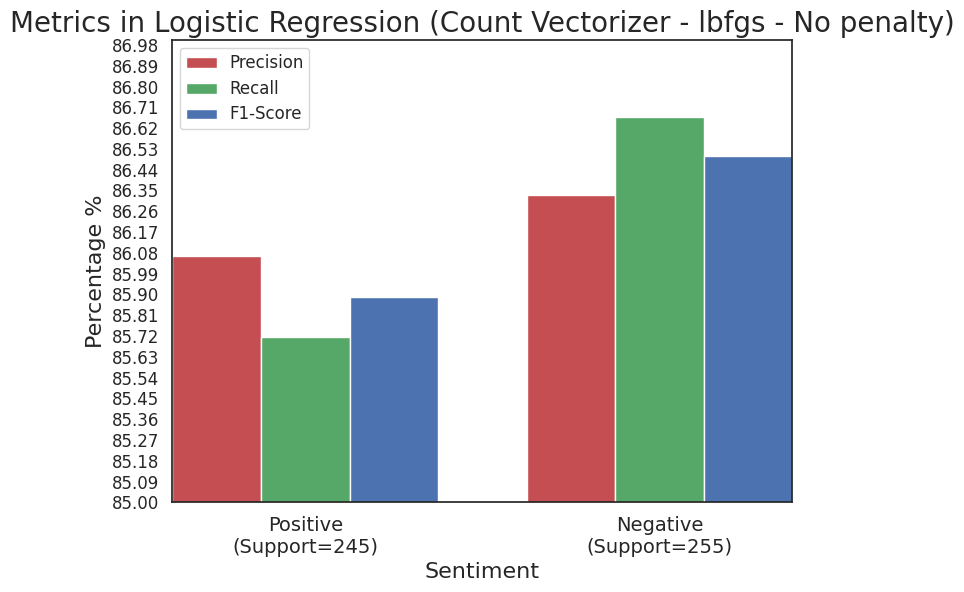


Confusion Matrix:
[[210  35]
 [ 34 221]]




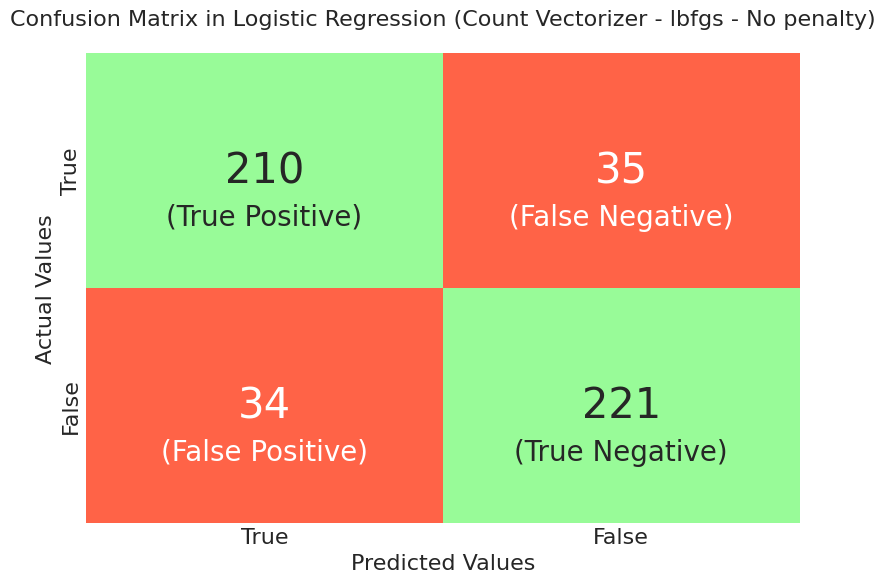

In [ ]:
#Count Vectorizer
print('Count Vectorizer:')
# train the model using X_train_count_dtm & prediction
%time logreg.fit(x_train_count_dtm, y_train)
y_pred_class = logreg.predict(x_test_count_dtm)

# compute accuracy of class predictions and show method metrics
report, accuracy = Metrics_Viz(y_test, y_pred_class, 85, 87, 0.09, 'Metrics in Logistic Regression (Count Vectorizer - lbfgs - No penalty)')

# compute and show confusion matrix
cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Count Vectorizer - lbfgs - No penalty)')

##### Tf-Idf


Tf_idf:
CPU times: user 116 ms, sys: 186 ms, total: 302 ms
Wall time: 173 ms

Metrics: 
<class 'numpy.float64'>
accuracy: 0.884
positive:  {'precision': 0.8879668049792531, 'recall': 0.8734693877551021, 'f1-score': 0.8806584362139918, 'support': 245}
negative:  {'precision': 0.8803088803088803, 'recall': 0.8941176470588236, 'f1-score': 0.88715953307393, 'support': 255}




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


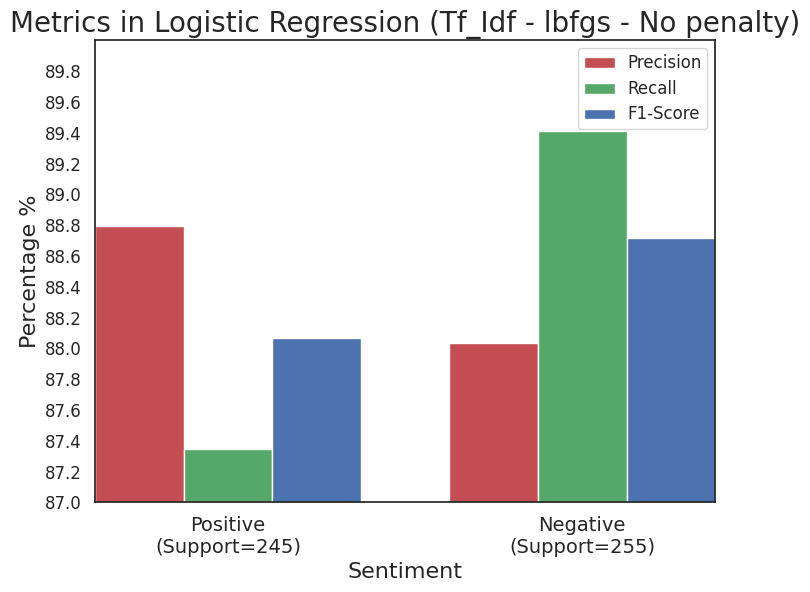


Confusion Matrix:
[[214  31]
 [ 27 228]]




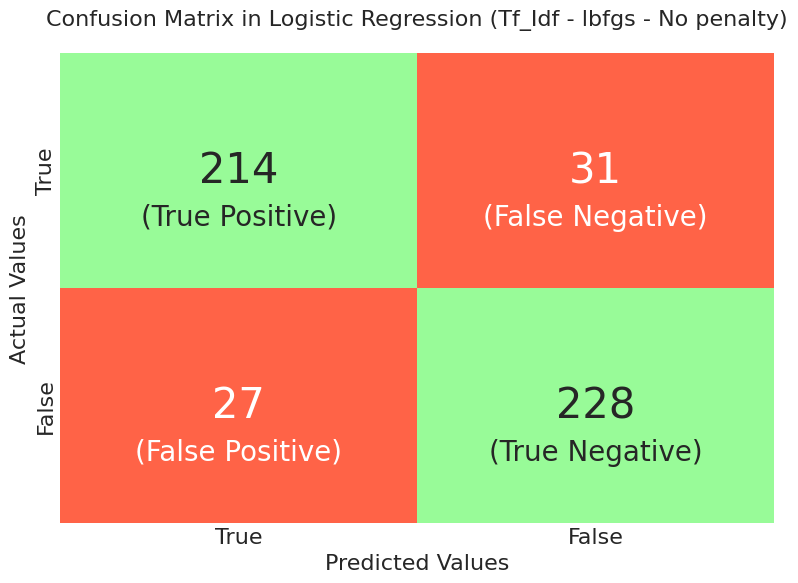

In [ ]:
# Tf_idf
print('\nTf_idf:')
# train the model using X_train_tfidf_dtm & prediction
%time logreg.fit(x_train_tfidf_dtm, y_train)
y_pred_class = logreg.predict(x_test_tfidf_dtm)

# compute accuracy of class predictions and show method metrics
lg_report, lg_accuracy = Metrics_Viz(y_test, y_pred_class, 87, 90, 0.2, 'Metrics in Logistic Regression (Tf_Idf - lbfgs - No penalty)')

# compute and show confusion matrix
lg_cm = Confusion_Matrix_Viz('Confusion Matrix in Logistic Regression (Tf_Idf - lbfgs - No penalty)')

# Model Comparison and point for further research


## Graph Analysis

We present the metrics of the tf_idf implementation for each of the methods Multinomial NB, Logistic Regression and SVM.

## SVM Model Offered the best Results and have a consistent Metrics.

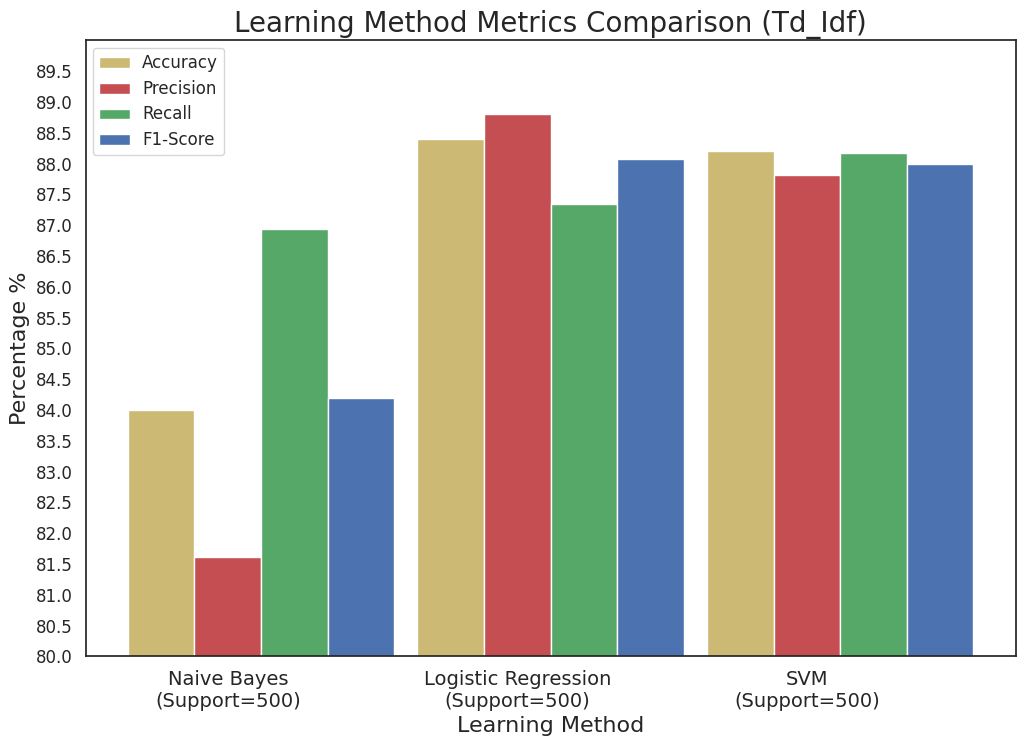

In [ ]:
N = 3
ind = np.arange(N) 
width = 0.23
fig, ax = plt.subplots(figsize=(12,8))
#ax.margins(x=0, y=-0.1)

xvals = [nb_accuracy*100, lg_accuracy*100, svm_accuracy*100]
bar1 = ax.bar(ind, xvals, width, color = 'y')

yvals = [nb_report['0']['precision']*100, lg_report['0']['precision']*100, svm_report['0']['precision']*100]
bar2 = ax.bar(ind+width, yvals, width, color = 'r')
 
zvals = [nb_report['0']['recall']*100, lg_report['0']['recall']*100, svm_report['0']['recall']*100]
bar3 = ax.bar(ind+width*2, zvals, width, color='g')
  
wvals = [nb_report['0']['f1-score']*100, lg_report['0']['f1-score']*100, svm_report['0']['f1-score']*100]
bar4 = ax.bar(ind+width*3, wvals, width, color = 'b') 

plt.xlabel("Learning Method", size=16)
plt.ylabel('Percentage %', size=16)
plt.title("Learning Method Metrics Comparison (Td_Idf)", size=20)
  
plt.ylim(80, 90)
plt.yticks(np.arange(80, 90, 0.5), size=12)
plt.xticks(ind+width,["Naive Bayes\n(Support={})".format(nb_report['0']['support'] + nb_report['1']['support']), "Logistic Regression\n(Support={})".format(lg_report['0']['support'] + lg_report['1']['support']), "SVM\n(Support={})".format(svm_report['0']['support'] + svm_report['1']['support'])], size=14)
plt.legend( (bar1, bar2, bar3, bar4), ('Accuracy', 'Precision', 'Recall', 'F1-Score'))
plt.setp(plt.gca().get_legend().get_texts(), fontsize='12')
plt.show()

# Brief Conclusion

---
## SVM Model Offered the best Results and have a consistent Metrics.


So we were able to see how from data such as film reviews we were able to build different models that are able to recognize the feeling associated with a text.

Some models have better results than others and some have trouble to keep the same learning behaviour (deep ones). And we tryed to understand why we observed those results based on the models architectures.

Thoses same models are even implementable in an application so the logic would be the prediction of good/bad feeling probability from a given text.